# Machine Learning: Donor prediction  

# Introduction


There is no doubt that accurate prediction of the donor behaviours will increase the charity organisation revenue and enable the company to make decisions on how to allocate resources as well as predicting future growth. In contrast, poor revenue forecasting will increase company production cost and reduce company efficiency. 
In this project, we compare the forecasting performance of six different Artificial Intelligence techniques together.  We aim to choose the most appropriate method to estimate cost and predict profit. 

In particular, we considered the following classification techniques: Logistic Regression, KneigborsClassifier, GaussianNB,  RandomForestClassifier, Linear Discriminant Analysis and Neural Network Classifier (NN). The results show that DecisionTressClasifier outperforms other selected techniques. When the favoured model is applied to estimate cost, evidence reveals that if the charity sends postcards to only those households that are likely to donate, it will spend £ 1946 and earn £4200, to generate a profit of £2254.


In [ ]:
Here’s an overview of the steps we’ll take in this article:
    
1.Importing the libraries
2.Loading the dataset
3.Data Exploration 
4.Data Preparation
5.Feature selection
6.Visualization of the variables
7.Evaluating the machine learning algorithm
8.Evaluating the dataset features



# Step 1. Libraries importation 

The first step, as always, is to import the required libraries. Execute the following code to do so:

In [1]:
# Modules needed
import sys
# scipy # for statistics
import scipy
# numpy for array, matrix and vector calculations
import numpy as np
# matplotlib for graphs
import pandas as pd
# scikit-learn for machine learning
import sklearn

# Load  specialised libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# model selection
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
# kpi: evaulating the performance of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score
# the stars of the show: the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Step 2: Loading the Dataset


The second step is to load the dataset from the local CSV file into your Python program. Let’s use the read_csv method of the pandas library. Execute the following code:

In [2]:
dataset = pd.read_csv(r'C:\Users\Ajay\Desktop\NoteMachine\Donor Raw Data_ML with Python.csv')

# Step 3: Data Exploration 

The third, we check for the missing values, numbers of rows, colunms and the number of the objects in the dataset.
From the dataset, we have 17372 rows, 50 colunms. We also noticed that the follwoing variables have missing values: TARGET_D, DONOR_AGE, INCOME_GROUP, WEALTH RATING and MONTHS_SINCE_LAST_PROM_RESP 


In [6]:
dataset.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [7]:
dataset.shape
# this imply, I have a  dataset of 19372 rows and that there are 50 columns

(19372, 50)

In [3]:
# bottom 10 records
dataset.tail(10)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
19362,1,10.0,191663,65,70.0,1,S,1,14,U,...,7.0,12.0,5.0,10.0,4,8,20,63,9.31,8
19363,0,NaN,191671,137,68.0,1,R,2,44,U,...,15.0,20.0,5.0,20.0,4,11,18,129,12.13,7
19364,0,NaN,191672,137,84.0,0,C,3,31,U,...,7.0,10.0,3.0,5.0,6,15,17,122,6.91,7
19365,0,NaN,191673,137,64.0,1,C,1,23,U,...,31.0,36.0,5.0,25.0,5,9,16,121,16.50,7
19366,0,NaN,191679,137,85.0,1,T,2,40,U,...,7.0,10.0,3.0,5.0,5,12,15,126,5.32,13
19367,0,NaN,191687,89,66.0,1,U,1,3,H,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,NaN,191710,137,77.0,1,C,1,24,H,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,NaN,191746,29,NaN,1,S,1,11,U,...,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,NaN,191775,129,78.0,1,?,?,.,U,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11
19371,1,150.0,191779,29,70.0,0,?,?,.,U,...,0.0,25.0,25.0,25.0,4,9,24,24,25.00,1


In [4]:
# to check the row
dataset.iloc[2]

TARGET_B                           0
TARGET_D                         NaN
CONTROL_NUMBER                    37
MONTHS_SINCE_ORIGIN              113
DONOR_AGE                         75
IN_HOUSE                           0
URBANICITY                         S
SES                                1
CLUSTER_CODE                      11
HOME_OWNER                         H
DONOR_GENDER                       F
INCOME_GROUP                       5
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     P
MOR_HIT_RATE                       0
WEALTH_RATING                      9
MEDIAN_HOME_VALUE               2388
MEDIAN_HOUSEHOLD_INCOME          405
PCT_OWNER_OCCUPIED                63
PER_CAPITA_INCOME              30855
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                    25
PCT_ATTRIBUTE3                    26
PCT_ATTRIBUTE4                    57
PEP_STAR                           1
RECENT_STAR_STATUS                 1
RECENCY_STATUS_96NK                S
F

In [5]:
dataset.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

# Step 4: Data Preparation 

In [ ]:
We check the percenatge of the missing value 

In [ ]:

 # for Target D variables = 14529/19372*100 = 75%
    # for DONOR AGE = 4795/19372*100 = 25%
    # for INCOME_GROUP = 4392/19372*100 = 23%
    # for  WEALTH RATING = 8810/19372*100 = 45%
    #  for MONTHS_SINCE_LAST_PROM_RESP  = 246/19372*100  = 1%
    

 To aviod model misspecifcation due to the lower sample, we removed the variables ( 'WEALTH RATING' and 'TARGET_D'), since percentage of missing values are more than 25% of the total samples

In [6]:
# Here we eliminate variable that are missing 
mis_var = ['TARGET_D', 'WEALTH_RATING']

dataset.drop(mis_var, axis = 1, inplace= True)

In [7]:
# the list of the variables without TARGET_D and WEALTH_RATING
dataset.head()

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,?,?,.,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,NaN,0,U,2,4,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [8]:
# We identies the list of other categories variables

cat_var = ['IN_HOUSE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'PEP_STAR',  'RECENT_STAR_STATUS','FREQUENCY_STATUS_97NK', 
           'RECENT_CARD_RESPONSE_COUNT','URBANICITY', 'SES', 'CLUSTER_CODE',
           'HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK']

In [9]:

data = dataset[cat_var]
print(data.tail())

       IN_HOUSE  INCOME_GROUP  PUBLISHED_PHONE  PEP_STAR  RECENT_STAR_STATUS  \
19367         1           4.0                1         0                   0   
19368         1           5.0                1         1                   1   
19369         1           1.0                1         0                   0   
19370         1           6.0                1         1                  14   
19371         0           5.0                1         0                   0   

       FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_COUNT URBANICITY SES  \
19367                      2                           1          U   1   
19368                      3                           2          C   1   
19369                      1                           0          S   1   
19370                      1                           0          ?   ?   
19371                      1                           1          ?   ?   

      CLUSTER_CODE HOME_OWNER DONOR_GENDER OVERLAY_SOURCE RECENCY_ST

In [10]:

data = dataset[cat_var]
print(data.head())

   IN_HOUSE  INCOME_GROUP  PUBLISHED_PHONE  PEP_STAR  RECENT_STAR_STATUS  \
0         0           2.0                0         1                   0   
1         0           7.0                0         1                   1   
2         0           5.0                0         1                   1   
3         0           6.0                1         1                   0   
4         0           2.0                1         0                   0   

   FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_COUNT URBANICITY SES  \
0                      1                           0          ?   ?   
1                      2                           2          R   2   
2                      3                           6          S   1   
3                      3                           4          U   2   
4                      1                           1          R   2   

  CLUSTER_CODE HOME_OWNER DONOR_GENDER OVERLAY_SOURCE RECENCY_STATUS_96NK  
0            .          H            M  

In [11]:
# Here we eliminate the following variables because most of thier categories are more than two. 
# Our priminary analysis indcates that inclusion of more than two variables do not improve the accuracy of our prediction.
 # Note that not excluding these variables may cause dummy variable trap caused by including a dummy variable for every single category.
del_var = ['URBANICITY','SES','RECENCY_STATUS_96NK','OVERLAY_SOURCE', 'DONOR_GENDER']

dataset.drop(del_var, axis = 1, inplace= True)

In [12]:

# MODEFICATION OF HOME_OWBER INTO AN INTEGERS
dataset['HOME_OWNER'].replace('H',2,inplace = True)
dataset['HOME_OWNER'].replace('U',1,inplace = True)



In [14]:
# To view the remaining data
print(dataset.tail(5))

       TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  \
19367         0          191687                   89       66.0         1   
19368         0          191710                  137       77.0         1   
19369         0          191746                   29        NaN         1   
19370         0          191775                  129       78.0         1   
19371         1          191779                   29       70.0         0   

      CLUSTER_CODE  HOME_OWNER  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  \
19367            3           2           4.0                1           241   
19368           24           2           5.0                1           240   
19369           11           1           1.0                1             0   
19370            .           1           6.0                1             0   
19371            .           1           5.0                1             2   

            ...        LIFETIME_GIFT_RANGE  LIFETIME_MAX_GIFT_

In [15]:
# for other missing  values, we calculate the mean values 

mean_age = dataset['DONOR_AGE'].mean()
mean_months_since = dataset['MONTHS_SINCE_LAST_PROM_RESP'].mean()
mean_income_group = dataset['INCOME_GROUP'].mean()

In [16]:
# We replaced the missing value with thier means

dataset['DONOR_AGE'].fillna(mean_age, inplace = True)
dataset['MONTHS_SINCE_LAST_PROM_RESP'].fillna(mean_months_since, inplace = True)
dataset['INCOME_GROUP'].fillna(mean_income_group, inplace = True)

In [17]:
# we view the data again the the misssing value have been replaced
print(dataset.head(10))

   TARGET_B  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  \
0         0               5                  101  87.000000         0   
1         1              12                  137  79.000000         0   
2         0              37                  113  75.000000         0   
3         0              38                   92  58.919051         0   
4         0              41                  101  74.000000         0   
5         0              52                  101  63.000000         0   
6         0              53                   89  71.000000         0   
7         1              67                   89  79.000000         0   
8         0              70                   89  41.000000         0   
9         1              71                  101  63.000000         0   

  CLUSTER_CODE  HOME_OWNER  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  \
0            .           2           2.0                0             0   
1           45           2           7.0      

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 43 columns):
TARGET_B                       19372 non-null int64
CONTROL_NUMBER                 19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      19372 non-null float64
IN_HOUSE                       19372 non-null int64
CLUSTER_CODE                   19372 non-null object
HOME_OWNER                     19372 non-null int64
INCOME_GROUP                   19372 non-null float64
PUBLISHED_PHONE                19372 non-null int64
MOR_HIT_RATE                   19372 non-null int64
MEDIAN_HOME_VALUE              19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME        19372 non-null int64
PCT_OWNER_OCCUPIED             19372 non-null int64
PER_CAPITA_INCOME              19372 non-null int64
PCT_ATTRIBUTE1                 19372 non-null int64
PCT_ATTRIBUTE2                 19372 non-null int64
PCT_ATTRIBUTE3                 19372 non-null int64
PC

In [19]:
# We noticed that 'CLUSTER_CODE' may contain some strings or  objects 
# To remove the object

nan_char = ["?","" ," .","-","NULL", "..."]
for char in nan_char:
    dataset = dataset.replace(char,np.nan)
    
    

In [20]:
#Checking whether object has been removed from the 'CLUSTER_CODE'
dataset[dataset['CLUSTER_CODE'].isnull()]

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,HOME_OWNER,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.000000,0,NaN,2,2.000000,0,0,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
15,0,156,125,73.000000,0,NaN,1,5.000000,0,17,...,8.0,10.0,2.0,10.0,6,15,18,124,6.09,10
18,0,186,125,58.919051,0,NaN,1,3.907543,0,0,...,17.0,20.0,3.0,11.0,10,28,15,125,8.82,23
24,0,257,89,55.000000,0,NaN,2,4.000000,0,0,...,17.0,20.0,3.0,19.0,5,12,25,87,11.71,3
39,0,379,89,58.919051,0,NaN,1,3.907543,0,0,...,10.0,15.0,5.0,15.0,6,17,18,85,8.50,4
43,1,403,89,58.000000,0,NaN,1,2.000000,0,0,...,30.0,50.0,20.0,35.0,8,21,7,83,33.50,4
55,0,544,89,58.000000,0,NaN,1,2.000000,0,0,...,10.0,15.0,5.0,15.0,11,26,18,78,8.88,7
62,0,583,137,76.000000,0,NaN,1,3.907543,0,0,...,8.0,10.0,2.0,10.0,7,19,21,129,4.36,8
81,0,696,137,86.000000,0,NaN,1,3.907543,1,0,...,7.0,10.0,3.0,7.0,10,30,5,129,6.46,25
128,1,1102,137,86.000000,0,NaN,1,4.000000,0,0,...,12.0,16.0,4.0,12.0,11,29,5,131,11.33,16


In [21]:
# We caculate the mode value for CLUSTER CODE and replaced the NAN with the model value

mode_cluster = dataset['CLUSTER_CODE'].mode()
print('mean',mode_cluster)



mean 0    40
dtype: object


In [22]:
dataset['CLUSTER_CODE'].fillna(mode_cluster, inplace = True)

In [23]:
# We encord the object to form a numerical value

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = dataset.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    dataset[i] = d[i].transform(dataset[i].fillna('NA'))

In [24]:
# We view our data again, 
# We noticed that, there is no missing value, object and NAN. 
# Therefore, our data can be used for modelling.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 43 columns):
TARGET_B                       19372 non-null int64
CONTROL_NUMBER                 19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      19372 non-null float64
IN_HOUSE                       19372 non-null int64
CLUSTER_CODE                   19372 non-null int64
HOME_OWNER                     19372 non-null int64
INCOME_GROUP                   19372 non-null float64
PUBLISHED_PHONE                19372 non-null int64
MOR_HIT_RATE                   19372 non-null int64
MEDIAN_HOME_VALUE              19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME        19372 non-null int64
PCT_OWNER_OCCUPIED             19372 non-null int64
PER_CAPITA_INCOME              19372 non-null int64
PCT_ATTRIBUTE1                 19372 non-null int64
PCT_ATTRIBUTE2                 19372 non-null int64
PCT_ATTRIBUTE3                 19372 non-null int64
PCT

# Step 5. Feature selection

From above table, we have more than 40 variables.  The question is that, would all these variable be relevant for our model? our concens is that, we don't want to include irrelevant variable in building our model, because existence of the irrelevant variables will exagerate the result. In this case,the training model will be inconsistence and less precise. To identify irrelevant variables and select important variables for the predictive model, the following tests are considered for variable selection.

1. Weight of evidence (WOE) and Information value (IV) 
2. Random Forest
3. Recursive Feature Elimination
4. Chi Square test
5. Linear Support Vector Classificatio
6. Extratrees Classifier



Note that, we combined all these tests because each of the test has advantage and disadvantage 

In [25]:
# we identify the lebel variable and other features

array = dataset.values

# features/ variables
features = array[:,1:] # : all rows , all columns from the seconds

# target B : donation or not
# Y needs to be one column only
labels = array[:,0] # : all rows , first column



# Feature selection using Weight of evidence (WOE) and Information value (IV) 

In [26]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [27]:
final_iv, IV = data_vars(dataset, dataset.TARGET_B)

In [28]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
39,RECENT_RESPONSE_COUNT,0.090920
6,FREQUENCY_STATUS_97NK,0.077015
37,RECENT_CARD_RESPONSE_COUNT,0.076266
40,RECENT_RESPONSE_PROP,0.075305
4,FILE_AVG_GIFT,0.068246
11,LIFETIME_AVG_GIFT_AMT,0.068246
10,LAST_GIFT_AMT,0.066563
5,FILE_CARD_GIFT,0.066285
14,LIFETIME_GIFT_COUNT,0.064998
36,RECENT_AVG_GIFT_AMT,0.062091


# Feature Selection Using Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)


0.9764608713607268


In [30]:
# We identify both target and features
labels = dataset['TARGET_B']
features = dataset[dataset.columns.difference(['TARGET_B','URBANICITY','SES','RECENCY_STATUS_96NK','OVERLAY_SOURCE', 'DONOR_GENDER'])] 

# We include all variables whether they will still be relevant 

In [31]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [32]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
0,CARD_PROM_12,0.045926
12,LIFETIME_CARD_PROM,0.044663
9,IN_HOUSE,0.043790
10,LAST_GIFT_AMT,0.040324
11,LIFETIME_AVG_GIFT_AMT,0.038476
16,LIFETIME_MAX_GIFT_AMT,0.038395
15,LIFETIME_GIFT_RANGE,0.035513
14,LIFETIME_GIFT_COUNT,0.035427
20,MEDIAN_HOUSEHOLD_INCOME,0.033774
2,CONTROL_NUMBER,0.033731


# Recursive Feature Elimination using LogisticRegression

In [33]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

In [34]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [35]:
Selected[Selected['RFE'] == True]

,index,RFE
0,CARD_PROM_12,True
6,FREQUENCY_STATUS_97NK,True
7,HOME_OWNER,True
8,INCOME_GROUP,True
9,IN_HOUSE,True
12,LIFETIME_CARD_PROM,True
14,LIFETIME_GIFT_COUNT,True
18,LIFETIME_PROM,True
21,MONTHS_SINCE_FIRST_GIFT,True
22,MONTHS_SINCE_LAST_GIFT,True


# Feature importance with ExtraTreesClassifier


In [36]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.02139897 0.02875667 0.03088355 0.02960668 0.0241464  0.02337597
 0.0212006  0.01688885 0.02673289 0.00514908 0.02524319 0.0245897
 0.02553956 0.02406156 0.02468356 0.02504053 0.0224592  0.0220575
 0.02619471 0.02915269 0.02911669 0.02589326 0.02798596 0.02661878
 0.02272967 0.02253462 0.02526524 0.02040347 0.02885476 0.02893106
 0.02859138 0.02820993 0.00940441 0.02861938 0.01673021 0.02231724
 0.02323993 0.02127421 0.02403841 0.02305163 0.02700927 0.01201861]


In [37]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [38]:
FI = FI.reset_index()

In [39]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
2,CONTROL_NUMBER,0.030884
3,DONOR_AGE,0.029607
19,MEDIAN_HOME_VALUE,0.029153
20,MEDIAN_HOUSEHOLD_INCOME,0.029117
29,PCT_ATTRIBUTE3,0.028931
28,PCT_ATTRIBUTE2,0.028855
1,CLUSTER_CODE,0.028757
33,PER_CAPITA_INCOME,0.028619
30,PCT_ATTRIBUTE4,0.028591
31,PCT_OWNER_OCCUPIED,0.028210


# Feature selection using  Chi Sequre 

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [41]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [42]:
chi_sq = chi_sq.reset_index()

In [43]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
2,CONTROL_NUMBER,378676.84
33,PER_CAPITA_INCOME,159846.83
19,MEDIAN_HOME_VALUE,42021.80
13,LIFETIME_GIFT_AMOUNT,3549.90
20,MEDIAN_HOUSEHOLD_INCOME,2227.72
24,MONTHS_SINCE_ORIGIN,1770.96
21,MONTHS_SINCE_FIRST_GIFT,1740.78
14,LIFETIME_GIFT_COUNT,1465.68
18,LIFETIME_PROM,987.28
5,FILE_CARD_GIFT,868.61


# Linear Support Vector Classification (L1)

In [44]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [45]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [46]:
l1[l1['L1'] == True]

,index,L1
0,CARD_PROM_12,True
1,CLUSTER_CODE,True
3,DONOR_AGE,True
4,FILE_AVG_GIFT,True
6,FREQUENCY_STATUS_97NK,True
8,INCOME_GROUP,True
9,IN_HOUSE,True
10,LAST_GIFT_AMT,True
12,LIFETIME_CARD_PROM,True
13,LIFETIME_GIFT_AMOUNT,True


# We combine all these tests together


In [47]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

# We vote each model

In [48]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [49]:
score_table['final_score'] = score_table.sum(axis=1)

In [50]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
0,CARD_PROM_12,0,1,0,0,1,1,3
6,FREQUENCY_STATUS_97NK,1,0,0,0,1,1,3
20,MEDIAN_HOUSEHOLD_INCOME,0,0,1,1,0,1,3
12,LIFETIME_CARD_PROM,0,1,0,0,1,1,3
9,IN_HOUSE,0,1,0,0,1,1,3
19,MEDIAN_HOME_VALUE,0,0,1,1,0,1,3
37,RECENT_CARD_RESPONSE_COUNT,1,0,0,0,1,1,3
36,RECENT_AVG_GIFT_AMT,0,0,0,0,1,1,2
34,PUBLISHED_PHONE,0,0,0,0,1,1,2
18,LIFETIME_PROM,0,0,0,0,1,1,2


In this section, we filiter our variables and selected variables that passed at least by one diagnoses test

In [51]:
features = features[list(score_table[score_table['final_score'] >= 1]['index'])]

To check for the perfect correlation among the variables, we plot the correlation graph using seaborn.The effect of perfect correlation means that your model may likely be overfitted. Therefore, it is better to reduce the number of the variables until all the terms can be uniquely
estimated.


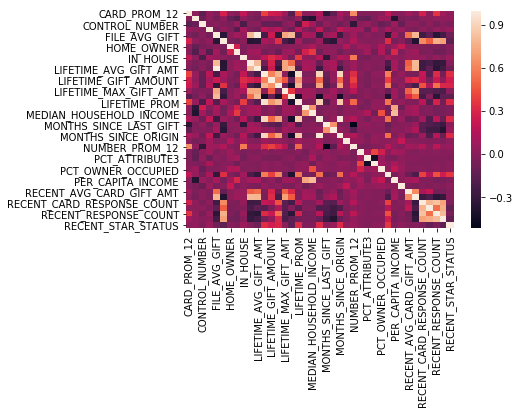

In [53]:
import seaborn as sns
%matplotlib inline
sns.heatmap(features.corr())

In [52]:
features.corr()

,CARD_PROM_12,CLUSTER_CODE,CONTROL_NUMBER,DONOR_AGE,FILE_AVG_GIFT,FREQUENCY_STATUS_97NK,HOME_OWNER,INCOME_GROUP,IN_HOUSE,LAST_GIFT_AMT,...,PEP_STAR,PER_CAPITA_INCOME,PUBLISHED_PHONE,RECENT_AVG_CARD_GIFT_AMT,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_RESPONSE_PROP,RECENT_STAR_STATUS
CARD_PROM_12,1.00,0.02,-0.14,0.04,-0.03,0.28,0.03,-0.01,0.21,0.02,...,0.20,0.02,-0.00,0.08,0.02,0.27,0.02,0.35,0.10,0.03
CLUSTER_CODE,0.02,1.00,-0.10,0.02,-0.06,0.04,-0.12,-0.19,0.03,-0.05,...,0.06,-0.37,-0.04,-0.03,-0.05,0.03,0.01,0.05,0.03,0.04
CONTROL_NUMBER,-0.14,-0.10,1.00,-0.01,0.01,-0.02,-0.05,0.05,-0.21,0.00,...,-0.07,0.08,-0.11,0.01,0.02,-0.04,0.02,-0.05,0.00,-0.03
DONOR_AGE,0.04,0.02,-0.01,1.00,-0.06,0.04,-0.02,-0.17,0.10,-0.04,...,0.12,0.01,0.06,-0.02,-0.03,0.03,-0.02,0.05,0.02,0.07
FILE_AVG_GIFT,-0.03,-0.06,0.01,-0.06,1.00,-0.35,0.01,0.10,0.05,0.80,...,-0.31,0.12,-0.04,0.54,0.79,-0.26,-0.14,-0.34,-0.25,-0.08
FREQUENCY_STATUS_97NK,0.28,0.04,-0.02,0.04,-0.35,1.00,-0.03,-0.08,0.01,-0.36,...,0.33,-0.05,-0.00,-0.11,-0.38,0.63,0.49,0.77,0.71,-0.14
HOME_OWNER,0.03,-0.12,-0.05,-0.02,0.01,-0.03,1.00,0.27,-0.03,0.01,...,-0.01,0.08,0.23,0.01,0.01,-0.02,-0.04,-0.02,-0.06,-0.00
INCOME_GROUP,-0.01,-0.19,0.05,-0.17,0.10,-0.08,0.27,1.00,-0.03,0.08,...,-0.08,0.31,-0.02,0.06,0.08,-0.04,-0.03,-0.07,-0.07,-0.03
IN_HOUSE,0.21,0.03,-0.21,0.10,0.05,0.01,-0.03,-0.03,1.00,0.05,...,0.11,0.04,0.01,0.06,0.06,0.05,-0.01,0.05,0.00,0.07
LAST_GIFT_AMT,0.02,-0.05,0.00,-0.04,0.80,-0.36,0.01,0.08,0.05,1.00,...,-0.21,0.11,-0.03,0.49,0.80,-0.26,-0.22,-0.31,-0.30,-0.00


From the above table and the seaborn graph, we noticed that the following variables appeared to be perfectly correlated 'LAST_GIFT_AMT','FILE_AVG_GIFT', RECENT_RESPONSE_COUNT', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_GIFT_AMOUNT', 'PER_CAPITA_INCOME', 'MEDIAN_HOUSEHOLD_INCOME' and etc. Therefore, we test for multicollinearity.


# Multicollinearity test using Variance Inflation Factor 

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [56]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 5].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

C:\Users\Ajay\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Below are the list of the variables that we can trust

In [57]:
list(vif['Features'])

['CLUSTER_CODE',
 'CONTROL_NUMBER',
 'IN_HOUSE',
 'LIFETIME_GIFT_AMOUNT',
 'LIFETIME_MAX_GIFT_AMT',
 'LIFETIME_MIN_GIFT_AMT',
 'MEDIAN_HOME_VALUE',
 'MOR_HIT_RATE',
 'PCT_ATTRIBUTE3',
 'PCT_ATTRIBUTE4',
 'PEP_STAR',
 'PUBLISHED_PHONE',
 'RECENT_AVG_CARD_GIFT_AMT',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_STAR_STATUS']

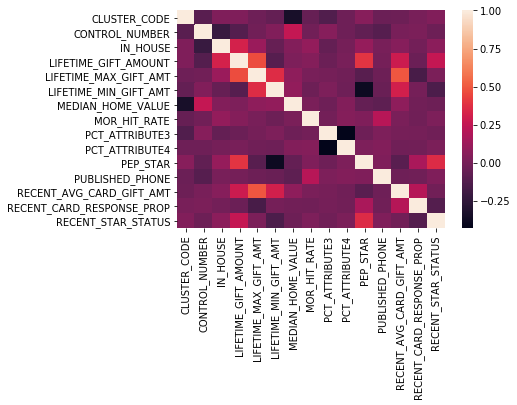

In [58]:
import seaborn as sns
%matplotlib inline
sns.heatmap(features.corr())

In [59]:
features.describe()

,CLUSTER_CODE,CONTROL_NUMBER,IN_HOUSE,LIFETIME_GIFT_AMOUNT,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,MEDIAN_HOME_VALUE,MOR_HIT_RATE,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,PUBLISHED_PHONE,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_STAR_STATUS
count,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00
mean,24.95,96546.23,0.07,104.43,19.21,7.62,1079.87,3.36,29.60,32.85,0.50,0.50,11.69,0.23,0.93
std,15.24,55830.64,0.26,105.72,16.10,7.96,960.75,9.50,15.12,17.84,0.50,0.50,10.83,0.19,2.55
min,0.00,5.00,0.00,15.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,48289.00,0.00,42.00,12.00,3.00,518.00,0.00,20.00,21.00,0.00,0.00,5.00,0.10,0.00
50%,25.00,96937.00,0.00,79.00,16.00,5.00,747.00,0.00,29.00,32.00,1.00,0.00,10.14,0.20,0.00
75%,37.00,145429.50,0.00,132.00,21.00,10.00,1227.00,3.00,39.00,43.00,1.00,1.00,16.00,0.33,1.00
max,53.00,191779.00,1.00,3775.00,1000.00,450.00,6000.00,241.00,99.00,99.00,1.00,1.00,300.00,1.00,22.00


# Step 6: Visualization of the variables

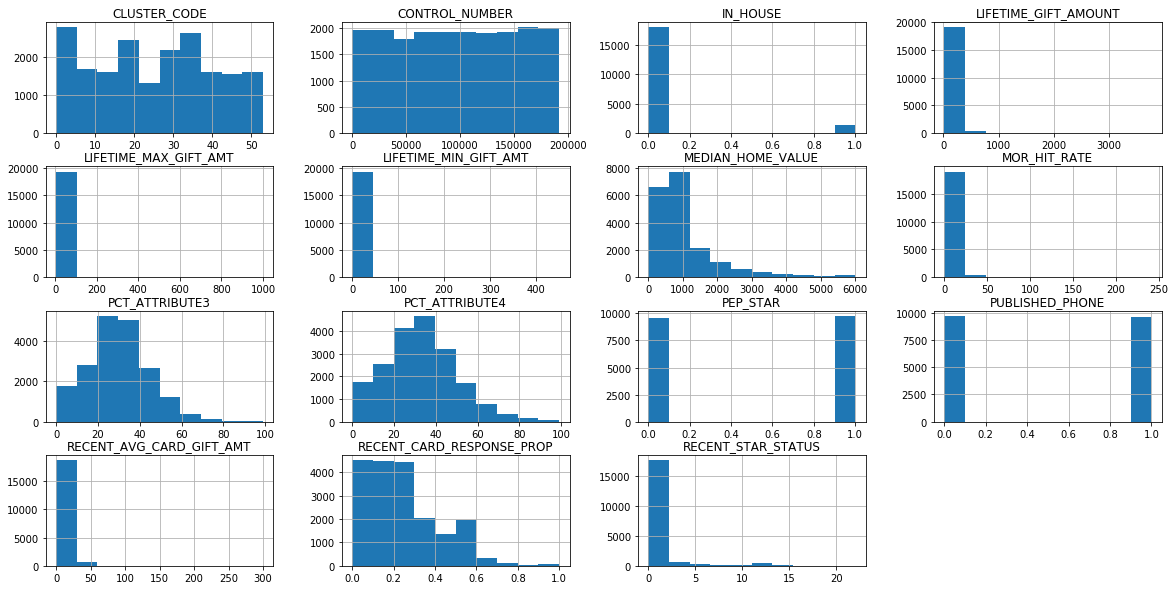

In [60]:
features.hist(figsize=(20,10))
plt.show()

# Step 7. Machine Learning Algorithm Training

In [62]:
# Split-out validation dataset
# Test options and evaluation metric
seed = 7
scoring = 'f1' # 'precision' 'recall' ' f1'

# here we convert the pandas dataframe into an array of figures
array = features.values

# Note : for array [rows , columns] 
# rows separated from column by comma

# features/ variables
X = array[:,1:] # : all rows , all columns from the seconds



# the percentage of the dataset in the test set
validation_size = 0.20



# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, labels, test_size=validation_size, random_state=seed)

# we now have X_train and Y_train for preparing models
# and  X_validation and Y_validation we can use later.


In [63]:
# Spot Check Algorithms: a list of the models we are going to use
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('GPC',GaussianProcessClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN',MLPClassifier()))



In [64]:
model

SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit=True, threshold=None)

In [65]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.010181 (0.005112)
LDA: 0.010615 (0.008638)
KNN: 0.151597 (0.013423)
CART: 0.284568 (0.017259)
NB: 0.080937 (0.023307)
RF: 0.134841 (0.020792)
NN: 0.143287 (0.162733)


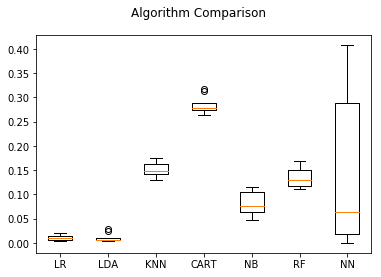

In [66]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.


In [68]:
# We list the 10 most important variables in our dataset 

from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
rf =RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)

# Here we list the n most important features
from itertools import compress
l = features.columns.values[1:]
b = rfe.get_support(indices=False)
print(list(compress(l, b)))

['CONTROL_NUMBER', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'MEDIAN_HOME_VALUE', 'MOR_HIT_RATE', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP']


In [73]:

# create a new model
cart = DecisionTreeClassifier()

cart.fit(X_train[:,b], Y_train)

# Here the final countdown
# here we apply the model on the testing test we separated earlier on
predictions = cart.predict(X_validation[:,b])

print('F1 Score')
print(f1_score(Y_validation, predictions),'\n')

TN, FP, FN, TP = confusion_matrix(Y_validation, predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(Y_validation, predictions),'\n')

print ('True positives',TP)
print ('False positives',FP)
print ('True negatives',TN)
print ('False negatives',FN,'\n')

print('Classification Report')
print(classification_report(Y_validation, predictions),'\n')

F1 Score
0.28118811881188116 

Confusion Matrix
[[2139  763]
 [ 689  284]] 

True positives 284
False positives 763
True negatives 2139
False negatives 689 

Classification Report
             precision    recall  f1-score   support

          0       0.76      0.74      0.75      2902
          1       0.27      0.29      0.28       973

avg / total       0.63      0.63      0.63      3875
 



In [74]:
 
Accuracy = (TP + TN)/(TN+FN+TP+FP)
Accuracy

0.6273548387096775

# Deployment of the model

In [75]:

mail_cost = 2

avg_gift = 15
print('If the charity orgnisation decided to mail only household that may likely donate')
print('The charity will spend the cost of £', (tp+fn)*mail_cost, 
      'and earn £', tp*avg_gift, 
      ', to make the profit of £',tp*avg_gift-(tp+fn)*mail_cost)

print()
print('If the charity mails every one')
print('The charity spends £', (tp+fp+tn+fn)*mail_cost, 
      'and earns £',(tp+fn)*avg_gift, 
      ',making profit of £',(tp+fn)*avg_gift-(tp+fp+tn+fn)*mail_cost)

If the charity orgnisation decided to mail only household that may likely donate
The charity will spend the cost of £ 1946 and earn £ 4185 , to make the profit of £ 2239

If the charity mails every one
The charity spends £ 7750 and earns £ 14595 ,making profit of £ 6845
